## Introduction:
* Training a ML model and data preparation is important step. Also it is important to measure the performance of the trained model. By using different metrics for performance evalution, we are in position to improve the overall predictive power of our model before we test on testing data.
* A classification problem can be solved using either directly predicting class labels or by calculating probabilities for each label and considering label with highest probability.

* **Accuracy single-handedly is generally not a good metric because dataset may be highly imbalanced. For e.g: We have 980 apples and 20 oranges and we have a model that classifies each fruit as apple. Then accuracy will be 980/100 = 98%; meaning that we have highly accurate model, but if we use this model to predict fruits on unseen data, it will fail since model can predict only one class. For this reason, metrics like Precision and Recall are used, because they take into account the 'type of error'.**
* If out of 1000, there are 600 yes and 400 no, or 700 yes and 300 no, then we can call this dataset as balanced dataset as number of yes and number of no are almost equal. But if count of yes(or no) is very less like(100-200) and other class count is big then that is called imbalanced dataset. So in balanced dataset, we can use accuracy as metrics, but not in imbalanced dataset.
* In most applications, there is some desired balance between precision and recall, which can be captured by combining the two into single metric, called F-measure.

## Confusion Matrix:
* It is a table used to describe performance of classification model on a set of data for which true values are known.
* In case of binary classification, it is a 2x2 matrix; in case of three classes in target variable, it is 3x3 matrix.
* It is also used to measure precision, recall, accuracy, AUC-ROC curve, etc.
* We can write anything on top and on side, but for remembering and as mentioned in many books, we will write actual values on top and on left hand side we will write predicted values.

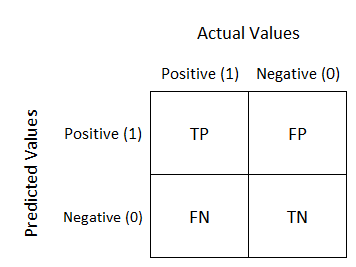


* In supervised classification problem, there exists a true output and model generated predicted output for each data point. So each data point can be assigned to one of the four categories(Let's say there are types of y_label: 1(yes) and 0(no):
    * True Positive(TP): We predicted yes and actual label was also yes
    * True Negative(TN): We predicted no and actual label was also no
    * False Positive: We predicted yes and actual label was no
    * False Negative: We predicted no and actual label was yes

* These are building blocks for most classifier problems.
* **False postives are also called Type I error and False negatives are also called Type II error**.
* We can compute Type I error using FPR(false positive rate): Formula: FP/FP+TN
* We can compute Type II error using FNR(false negative rate; also called the miss rate): Formula: FN/FN+TP
* In any classification problem, our aim should be to reduce Type I and Type II errors.

## Accuracy:
* It describes: overall, how often is the classifer correct?
* Formula: (TP+TN)/total = (TP+TN) / (TP+FP+FN+TN)

## Misclassification Rate: 
* It describes: Overall, how often it is wrong?
* Formula: (FP+FN)/total = (FP+FN) / (TP+FP+FN+TN)
* It is equivalent to 1 minus accuracy.
* It is also known as "Error Rate".

## Precision:
* For imbalanced dataset, we focus on precision and recall.
* Out of all positive classes we predicted correctly, how many are actually positive.
* It is known by postive prediction value.
* Formula: TP/TP+FP

## Recall:
* Out of all positive values, how much we postive values we predicted correctly.
* It should be high as possible.
* It is known by TPR(true positive rate) or sensitivity.
* Formula: TP/TP+FN

## False positive rate:
* When it is actually no, how often it predicts yes?
* Formula: FP/FP+TN

## True negative rate:
* When it's actually no, how often does it predict no?
* Formula: TN/FP+TN
* It is equivalent to 1 minus False Positive Rate
* It is also known as "Specificity".

**Now when we have to focus on precision**:
- In spam detection, if mail is not a spam and model has detected it has spam(false positives are high), then important mails will go to spam. So here we have to reduce false positives.

**Now when we have to focus on recall**:
- Whether a person is having diabetes or not, if person is having cancer but model has predicted not having(false negatives are high) then this will be not good. So here we have to reduce false negatives.

* So we can say:
    * When false positives are very much important, the precision is our goto metric.
    * When false negatives are very much important, the recall is our goto metric.


## F-beta(or F-measure or F-score):
* In some cases, false postives and false negatives are both important in an imbalanced dataset. So here we can combine precision and recall into single metric, called F-beta score.
* Formula for this is:
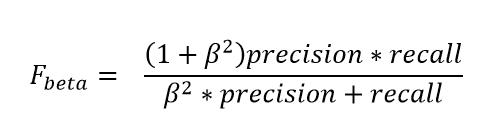

* If we consider β value as 1, then we get: 2 * Precision * Recall / (Precision + Recall); and this is called as F1-score. This formula here is also harmomic mean of two numbers.
* Some β values can be 0.5, 1 and 2. If β is 0.5 then we say as F0.5 measure(or score) and similarly for 2.
* Now what to select β as:
    * **β=1**: When we have problem statement, where false negatives and false positives are equally important.
    * **β=0.5**: When we have problem statement, where false positives are having more impact than false negatives.
    * **β=2**: When we have problem statement, where false negatives are having more impact than false positives.
* Sometimes, based on false negatives, β value ranges between 1 to 10, considereing where false negative is having greater impact. Also β value can also range betwen 0 to 1, when false positives are having greater impact.

## ROC and AUC Curve:
* These are mostly used for binary classification problems.
* It tells what threshold we should decide to divide among classes, like in case of logistic regression anything greater than 0.5 is considered in class 1 and less than 0.5 is 0. If we want some different threshold we can use ROC.
* Here we require True positve rate and false positive rate.

### ROC Curve:
* It stands for receiver operating characteristics curve.
* It shows performance of classification model at all classification thresholds.
* ROC curve has two parameters: TPR(true positive rate) and FPR(false positive rate).
* ROC curve plots TPR vs FPR at different classification thresholds.
* Let's take an example, let's say we have a dataframe:

In [9]:
import pandas as pd
import numpy as np

data = {'y':[1, 0, 1, 1, 0, 1],
        'ŷ':[0.7, 0.96, 0.4, 0.3, 0.2, 0.67]}

#  ŷ are model probabilities
df = pd.DataFrame(data)
df

,y,ŷ
0,1,0.70
1,0,0.96
2,1,0.40
3,1,0.30
4,0,0.20
5,1,0.67


In [10]:
# Let say we have some threshold values list:
thresholds = [0, 0.2, 0.4, 0.6, 0.8, 1]

# If we consider threshold value as 0 for now
selected_theshold = 0

# If y's probability is greater than selected threshold, then all predicted value will be 1 else 0
df['ŷ(0)'] = np.where(df['ŷ'] > 0, 1, 0)
# Here every value is greater than 0 so ŷ(0) becomes 1 for each row
df.head()

,y,ŷ,ŷ(0)
0,1,0.70,1
1,0,0.96,1
2,1,0.40,1
3,1,0.30,1
4,0,0.20,1


Once we have this we will calculate **True positive rate** and **False positive rate**
TPR = TP/(TP+FN) ,   FPR = FP/(FP+TN)

### For True positive rate:
In this case we can see we have true positives(4 times 1 is present in y and ŷ(0))
And false negatives(we predicted 0, but actually it was 1) are: 0

TPR = 4/4+0 => TPR = 1

### For False positive rate:
FP(when predicted output is 1, actual was 0): 2

TN(when predicted output is 0, actual was also 0): 2
So FPR = 2/2+0 => FPR = 1

Similarly if we consider threshold as 0.2 and calculate ŷ(0.2)

In [11]:
selected_threshold = 0.2
df['ŷ(0.2)'] = np.where(df['ŷ'] > 0.2, 1, 0)
df

,y,ŷ,ŷ(0),ŷ(0.2)
0,1,0.70,1,1
1,0,0.96,1,1
2,1,0.40,1,1
3,1,0.30,1,1
4,0,0.20,1,0
5,1,0.67,1,1


Now if we calculate TPR and FPR we will get:
TPR: 4/4+0 =1
FPR: 1/1+1 = 0.5

* Similarly we can calculate this for multiple threshold we will get multiple values.
* Now we have to plot these to a graph, because domain expertise person looks at graph, so our points are (FPR, TPR)

If we plot this on curve(we will get something like this)
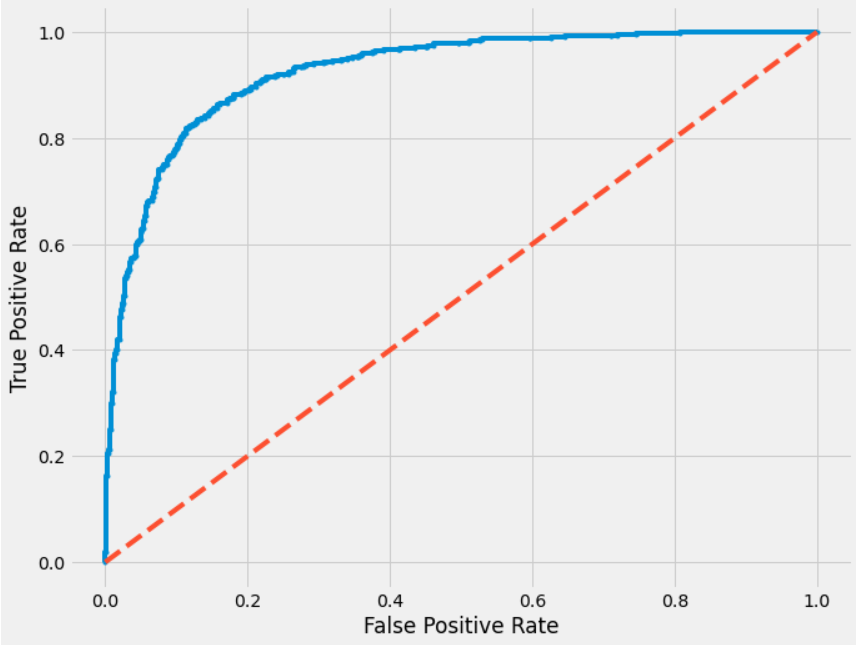

**Just Look at the blue line**

### AUC:
* It stands for area under the curve. If we draw a line(blue line drawn between all data points) then area under than line is AUC.
* AUC measures entire 2D area undeneath ROC curve from (0, 0) to (1,1)
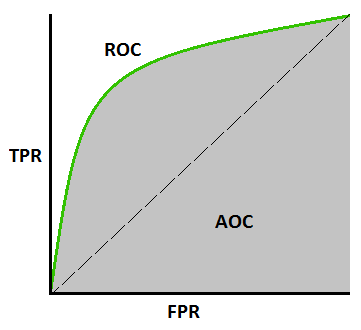

* More the area under the curve, better the model is, better we are able to distinguish between positives and negatives class.
* Also a good model should cover more area than the dotted line in above figure(which is passing through the centre). Because if AUC will be less then it is a dumb model. Probability is less here, so we have to decide on random basis, whether it is is 0 or 1.
* Therefore, if AUC=1 then predictions are 100% correct, if AUC=0, then predictions are 100% wrong & when AUC = 0.5%, it means model has no class separation capacity(as we discussed in previous point).

### Notes:
* Now when we show this ROC and AUC to domain expertise person, they have to decide and tell, what we have to focus on, let's say if the person says we have to focus on true postive rate then we can any good threshold which is lying near 1 wrt y-axis and if we want less false postive rate then we will take threshold points which lie on left side. (Check first graph)


## Metrics for Multiclass classification:

* Let's say we have three classes: A, B and C.
* Now here we can't draw a 2x2 confusion matrix as we saw in case of binary classification.
* Let's take an example:

In [3]:
y_true = ['A', 'A', 'A', 'A', 'A',  'B', 'B', 'B', 'B', 'B',  'C', 'C', 'C', 'C', 'C']
y_pred = ['A', 'A', 'B', 'A', 'C',  'B', 'B', 'A', 'B', 'B',  'C', 'A', 'C', 'C', 'A']

from sklearn import metrics

# Print confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print precision, recall, etc. from classification report
print(metrics.classification_report(y_true, y_pred))

[[3 1 1]
 [1 4 0]
 [2 0 3]]
              precision    recall  f1-score   support

           A       0.50      0.60      0.55         5
           B       0.80      0.80      0.80         5
           C       0.75      0.60      0.67         5

    accuracy                           0.67        15
   macro avg       0.68      0.67      0.67        15
weighted avg       0.68      0.67      0.67        15



* In multiclass classification we can't consider terms like TN, FN, FP and TP, so here we can see confusion matrix, to calculate accuracy here: we add all diagonal elements and divide it by sum of all elements we will get accuracy
    * (3+4+3) / (1+2+0+1+1+0+3+4+3) = 0.6655 ~ 0.67(we can see that in classification report too)
* To calculate precision here, we have to know what is precision first: Precision for a class (let's say A) is number of correctly predicted `A` out of all predicted `A`.
    * So if we see in confusion matrix, columns are for prediction and rows are for actual values. First column is for A, 2nd for B and 3rd for C. So to verify:
    * For precision: correctly predicted `A` will be in (0,0) i.e 3. And for all predicted `A` values it will be first column so: 3+1+2.
    * Therefore: 3/(3+1+2) = 1/2 = 0.5, we can see it is same in classification report too.
* Similarly for class `B`
    * correctly predicted value(i.e. True positive) here will be (1,1) i.e 4 and all predicted values of `B` will be second column: 1+4+0. Therefore: 4/5 i.e 0.8
    
## Important Questions:
1) Some examples where false positives is more important than false negatives
- Email spam classification
- FP-> Falsely said positive, if we are talking about where risk is the wrt being positive then FP should be more important. Another example can be: Did a student cheat on his exam ???  If positive(means if model says the student cheats, then this is a risker move by model, Might student career may spoil with this decision).

2) Some examples where false negatives is more important than false positives
- False negatives are more important in healthcare field, if a model predicts negative but the person really has that disease then this would be dangerous.
- Breathalyzer tests: a false positive would show that you are over the limit when you haven’t even touched an alcoholic drink. A false negative would register you as sober when you are drunk, or at least over the limit. False negative may results in accidents if he is allowed to drive and he is drunk.
- Stock Market Crash Prediction: Imagine a situation where our model has wrongly predicted that the market will not crash and instead it crashed, the people have to go through a lot of losses in this case.

3) Some examples where false positives is of same importance as false negatives
- Proving innocent or guilty to a person in court. Here, a false positive would result in an innocent party being found guilty, while a false negative would produce an innocent verdict for a guilty person.
